In [2]:
import os
from os.path import join
import pandas as pd

input_data_dir = os.environ["DATA"] + "/01_space_enumeration/csv_non_qm/" 

categories = ["Alone", "btx", "naphtalene", "tetracene"]

# Reading data
cat_dataframes = []
for category in categories:
    cat_dataframes.append(pd.read_csv(join(input_data_dir, category + ".csv"), delimiter=","))
    
# Labelling data with input file
for i in range(len(categories)):
    cat_dataframes[i]["from"] = categories[i]
    
# Merging all dataframes
complete_df = pd.concat(cat_dataframes)
    
cat_dataframes_prefixed = []
# Creating complete dataframe with prefixed properties
for i in range(len(cat_dataframes)):
    curr_df = pd.DataFrame()
    for k in complete_df.keys():
        if k == "id":
            curr_df["id"] = cat_dataframes[i]["id"]
        elif k != "from":
            curr_df[categories[i] + "_" + k] = cat_dataframes[i][k]
            
    if i == 0:
        complete_df_prefixed = curr_df
    else:
        complete_df_prefixed = pd.merge(complete_df_prefixed, curr_df, on="id")
        



In [3]:
complete_df

id    qed  penalized_logP  CLScore  \
0          1  0.625          -3.124    2.683   
1          2  0.588          -3.080    3.053   
2          3  0.620          -3.812    2.830   
3          4  0.613          -4.407    3.077   
4          5  0.590          -3.478    2.302   
...      ...    ...             ...      ...   
13719  13720  0.216          -0.380    2.948   
13720  13721  0.287          -0.778    2.673   
13721  13722  0.299          -0.868    3.066   
13722  13723  0.199          -0.167    3.023   
13723  13724  0.295          -0.191    2.667   

                                                  smiles       from  
0                                   CC1=NC2=NSN=C2N=C1Cl      Alone  
1                                    CC1=NC2=NSN=C2N=C1C      Alone  
2                                    CC1=NC2=NSN=C2N=C1O      Alone  
3                                    CC1=NC2=NSN=C2N=C1N      Alone  
4                                    CC1=NC2=NSN=C2N=C1F      Alone  
...                                                  ...        ...  
13719  N=C(Cl)C(C1=CC2=CC3=CC4=CC=CC=C4C=C3C=C2C=C1)N...  tetracene  
13720  N=C(Cl)C1(C2=CC3=CC4=CC5=CC=CC=C5C=C4C=C3C=C2)...  tetracene  
13721  O=C(Cl)C(NC1=NSN=C1)C1=CC2=CC3=CC4=CC=CC=C4C=C...  tetracene  
13722  S=C(Cl)C(NC1=NSN=C1)C1=CC2=CC3=CC4=CC=CC=C4C=C...  tetracene  
13723  N=C(Cl)C(NC1=NSN=N1)C1=CC2=CC3=CC4=CC=CC=C4C=C...  tetracene  

[54896 rows x 6 columns]

## Pearson correlations

In [5]:
import numpy as np
from IPython.display import display, HTML
from scipy.stats import pearsonr

properties = ["qed", "penalized_logP", "CLScore"]

prop_dataframes_dict = {}

for i, prop in enumerate(properties):
    curr_df = pd.DataFrame()
    curr_df["id"] = np.arange(len(complete_df_prefixed["id"]))
    
    # Iterating over keys
    for k in complete_df_prefixed.keys():
        if k.endswith(prop):
            curr_df[k] = complete_df_prefixed[k]
    
    prop_dataframes_dict[prop] = curr_df
    
for k, v in prop_dataframes_dict.items():
    print("Pearson correlation for " + str(k))
    display(HTML(v.corr(method="pearson").to_html()))
    print()
    print()
    print()
    
    
for k, v in prop_dataframes_dict.items():
    print("Scipy : Pearson correlation for " + str(k))
    for mol in ["btx", "naphtalene", "tetracene"]:
        alone_data = v["Alone_"+k]
        mol_data = v[mol+"_"+k]
        
        alone_clean = []
        mol_clean = []
        
        for i in range(len(alone_data)):
            if not np.isnan(alone_data[i]) and not np.isnan(mol_data[i]):
                alone_clean.append(alone_data[i])
                mol_clean.append(mol_data[i])
        
        corr, pval = pearsonr(alone_clean, mol_clean)
        print(mol +" " + str(corr) +", " + str(pval))

Pearson correlation for qed





Pearson correlation for penalized_logP





Pearson correlation for CLScore





Scipy : Pearson correlation for qed
btx 0.7388767530957319, 0.0
naphtalene 0.7447694061312685, 0.0
tetracene 0.6412995052811675, 0.0
Scipy : Pearson correlation for penalized_logP
btx 0.977199848104118, 0.0
naphtalene 0.9872185602873426, 0.0
tetracene 0.980321746376865, 0.0
Scipy : Pearson correlation for CLScore
btx 0.9542808776656837, 0.0
naphtalene 0.9475737137705859, 0.0
tetracene 0.9523366927382916, 0.0


## Spearman correlations (rank)

In [8]:
from scipy.stats import spearmanr

for k, v in prop_dataframes_dict.items():
    print("Spearman correlation for " + str(k))
    display(HTML(v.corr(method="spearman").to_html()))
    print()
    print()
    print()
    
for k, v in prop_dataframes_dict.items():
    print("Scipy : Pearson correlation for " + str(k))
    for mol in ["btx", "naphtalene", "tetracene"]:
        alone_data = v["Alone_"+k]
        mol_data = v[mol+"_"+k]
        
        alone_clean = []
        mol_clean = []
        
        for i in range(len(alone_data)):
            if not np.isnan(alone_data[i]) and not np.isnan(mol_data[i]):
                alone_clean.append(alone_data[i])
                mol_clean.append(mol_data[i])
        
        corr, pval = spearmanr(alone_clean, mol_clean)
        print(mol +" " + str(corr) +", " + str(pval))

Spearman correlation for qed





Spearman correlation for penalized_logP





Spearman correlation for CLScore





Scipy : Pearson correlation for qed
btx 0.7734248356281067, 0.0
naphtalene 0.7186887511059689, 0.0
tetracene 0.6839924611641193, 0.0
Scipy : Pearson correlation for penalized_logP
btx 0.9660745174859685, 0.0
naphtalene 0.9808211143038258, 0.0
tetracene 0.9705530618459165, 0.0
Scipy : Pearson correlation for CLScore
btx 0.9424003597538554, 0.0
naphtalene 0.9310708198167319, 0.0
tetracene 0.9366093537646538, 0.0


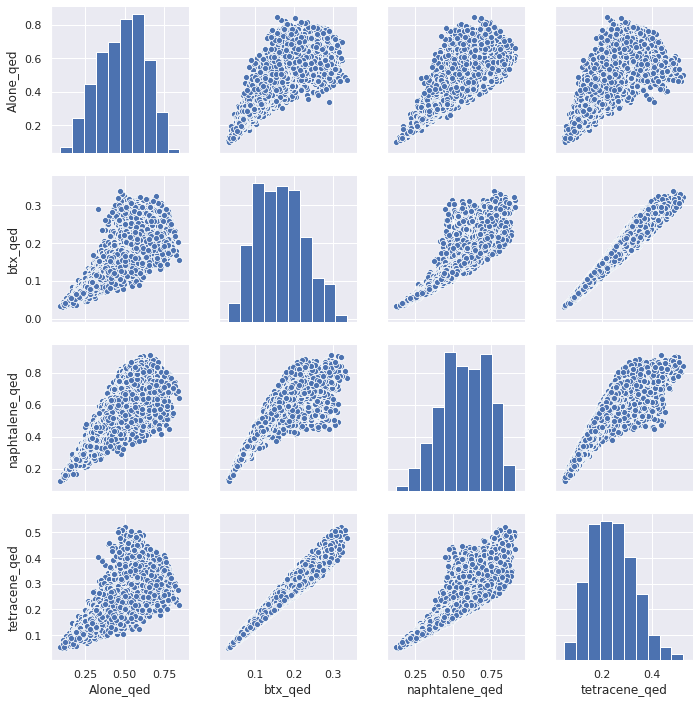

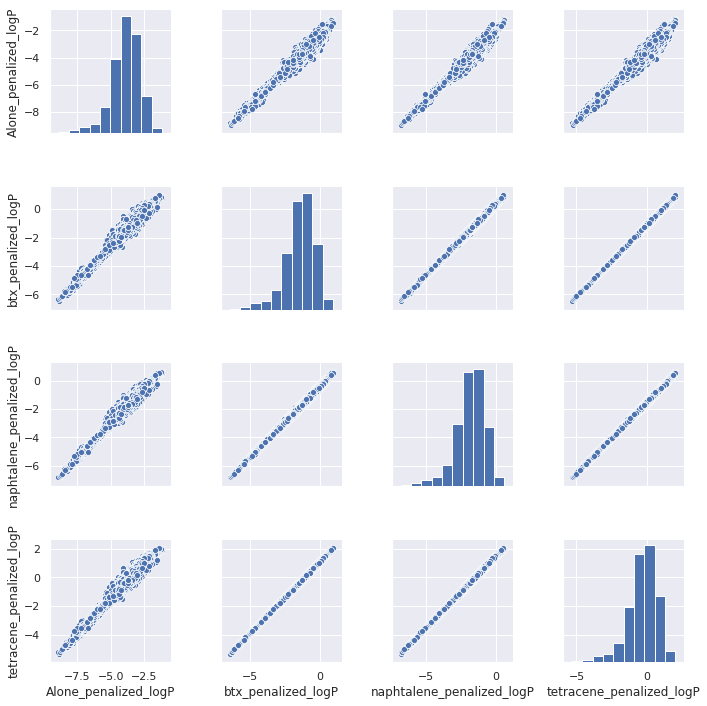

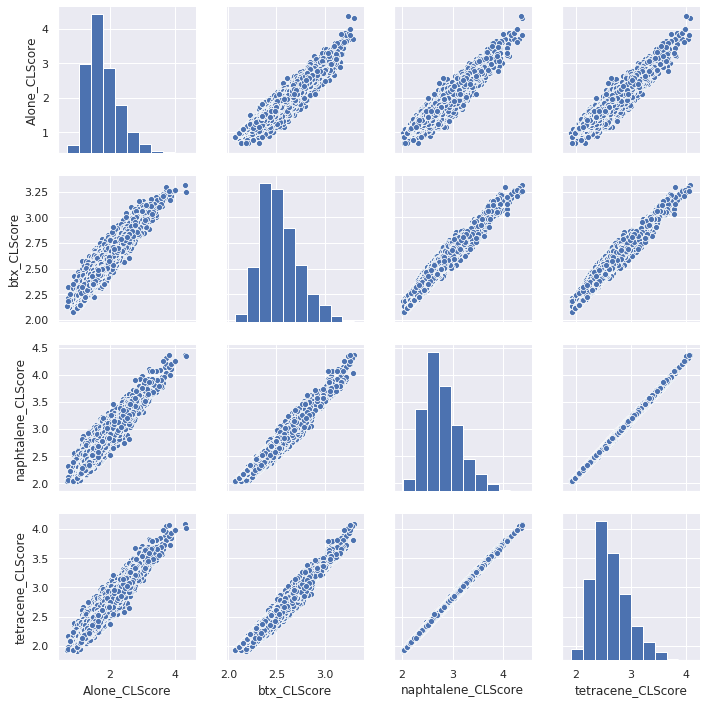

In [6]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

for k, v in prop_dataframes_dict.items():
    sns.pairplot(v.drop(["id"], axis=1))

## Plotting properties distributions

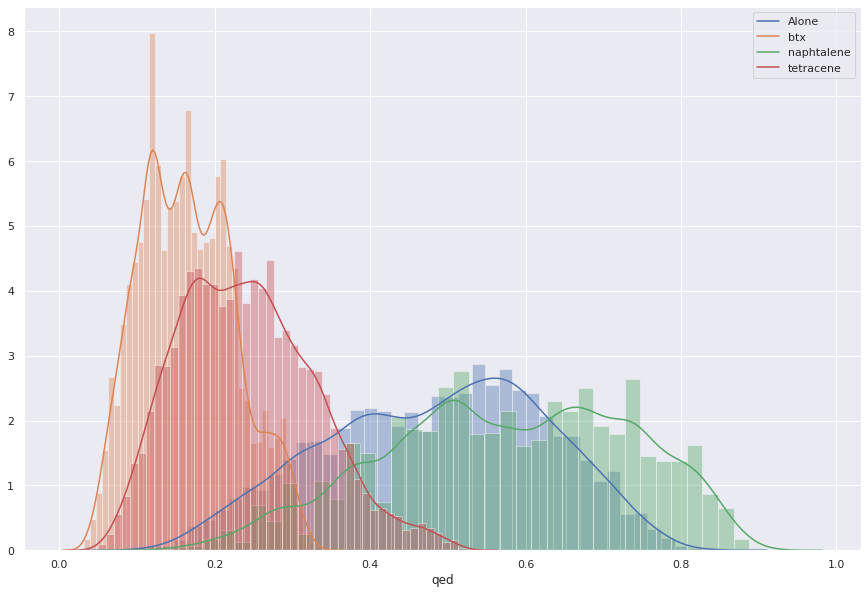

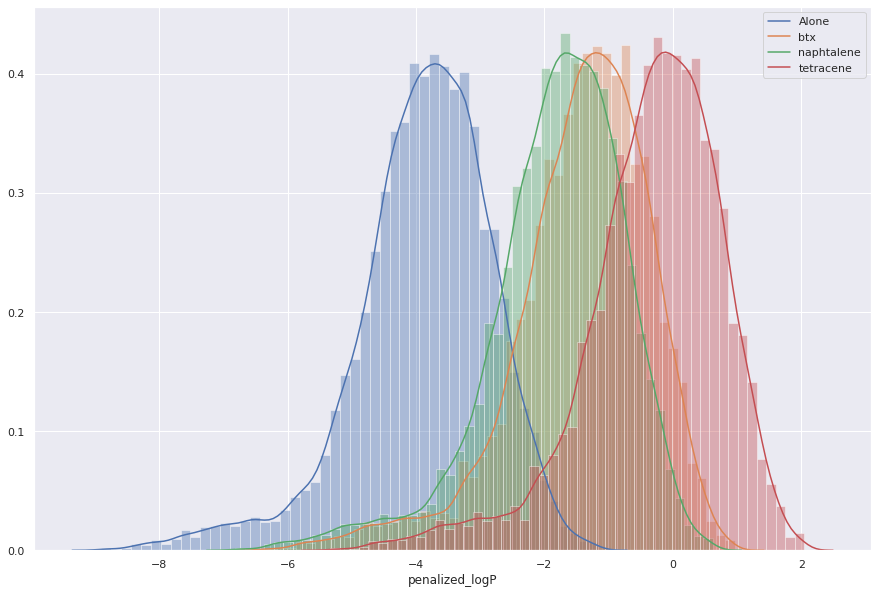

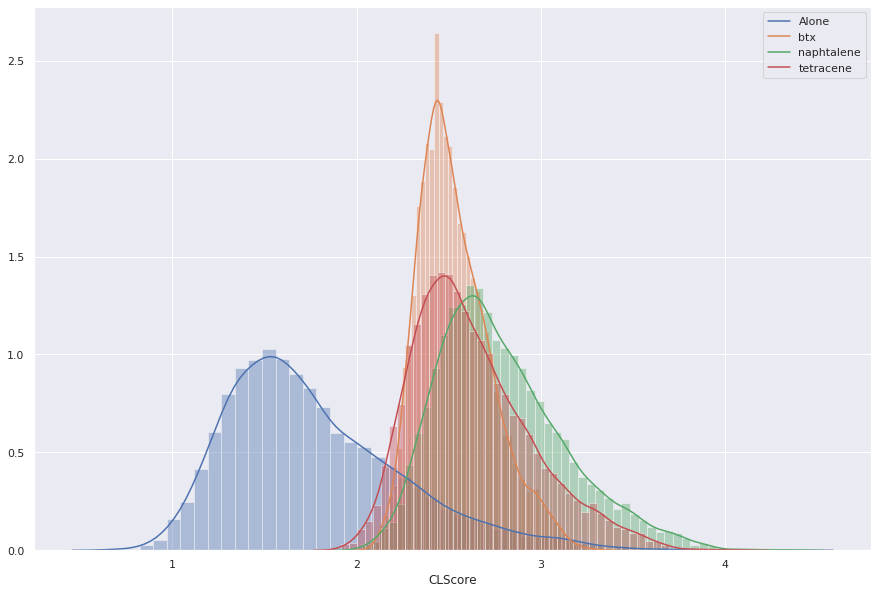

In [26]:
for prop in ["qed", "penalized_logP", "CLScore"]:
    plt.figure(figsize=(15, 10))
    for category in categories:
        sns.distplot(complete_df[complete_df["from"] == category][prop], kde_kws={"label":category})
    plt.show()

## Plotting BTX properties vs other molecules

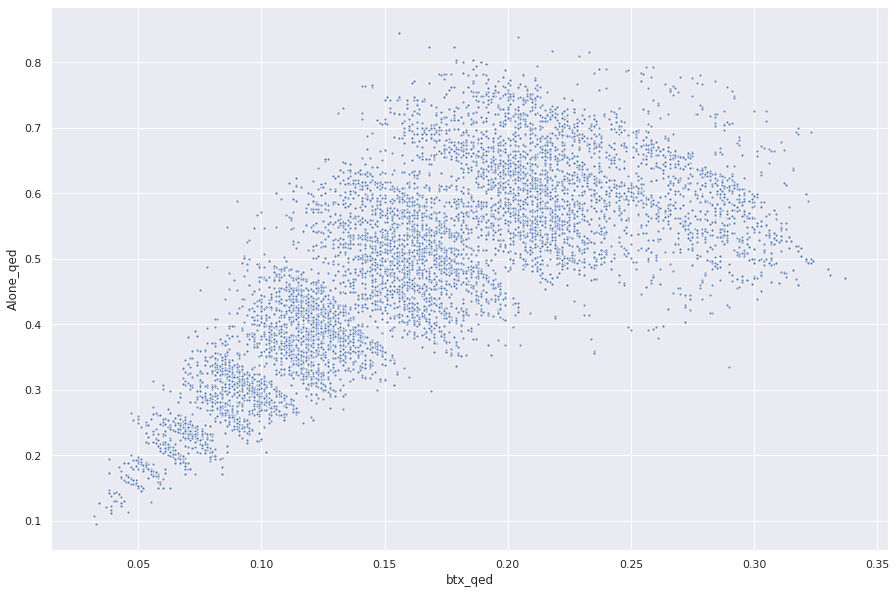

<Figure size 1080x720 with 0 Axes>

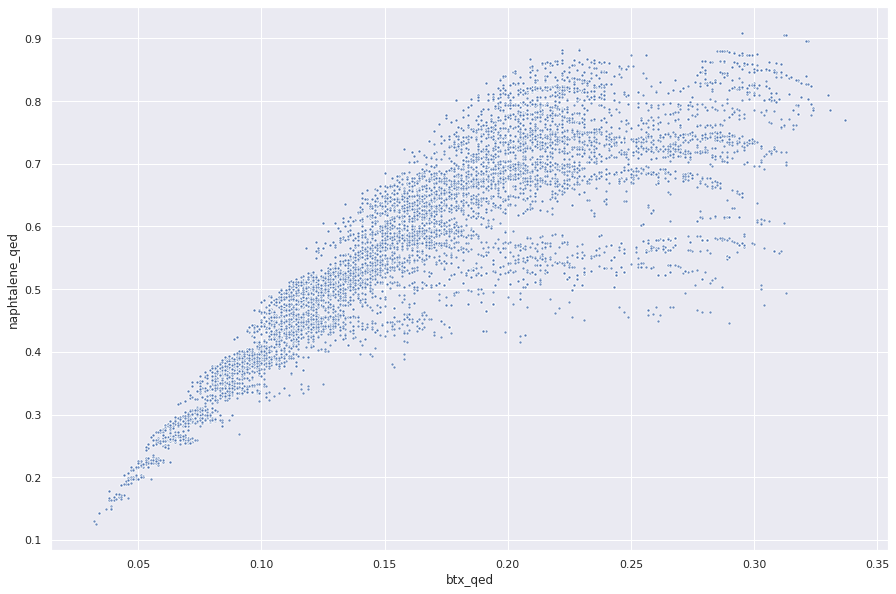

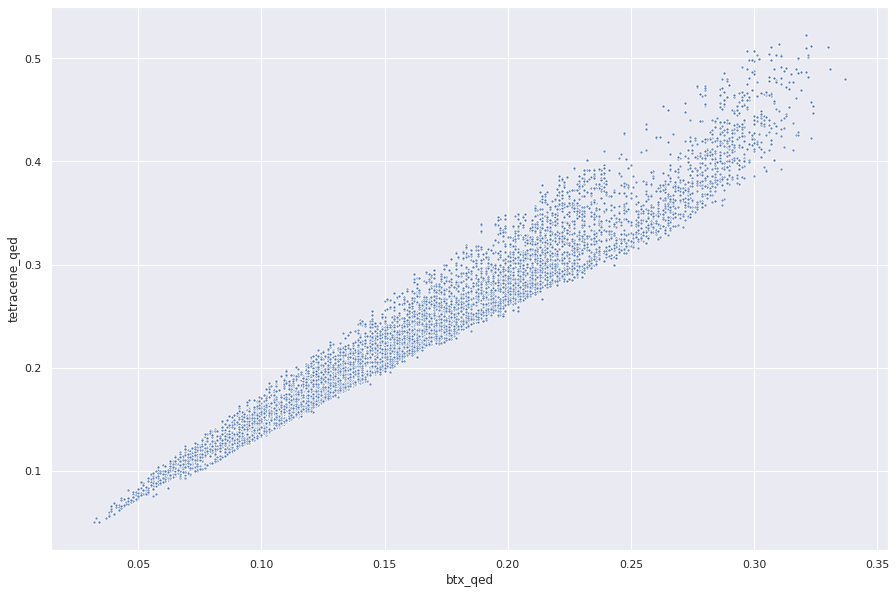

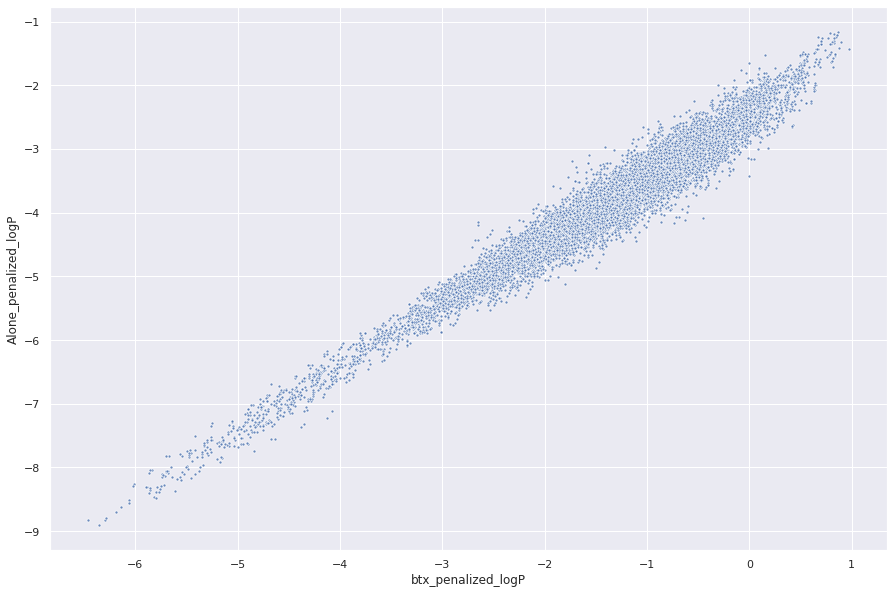

<Figure size 1080x720 with 0 Axes>

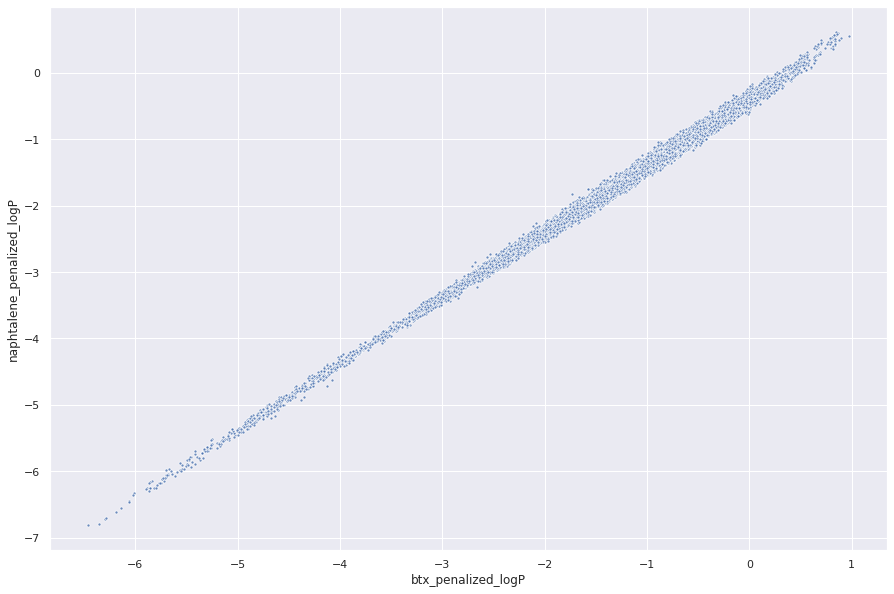

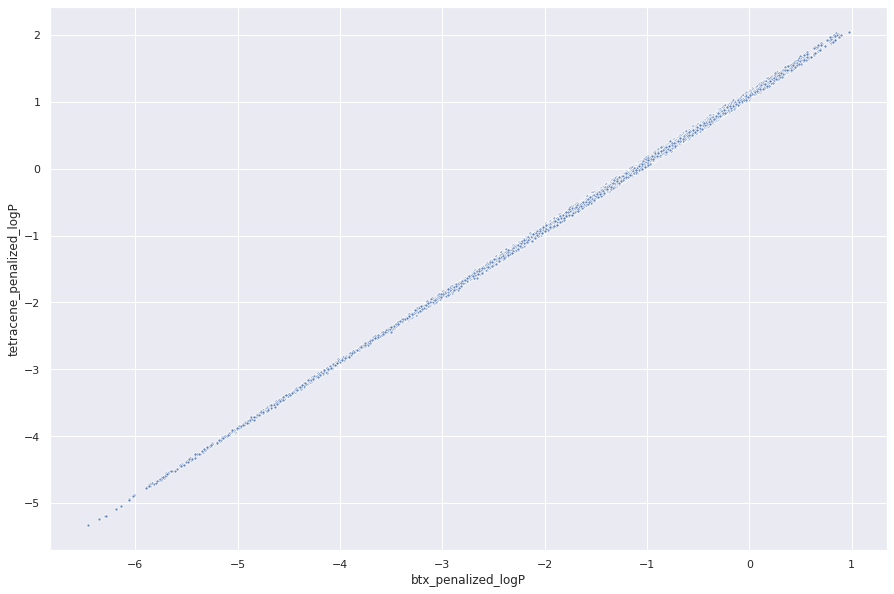

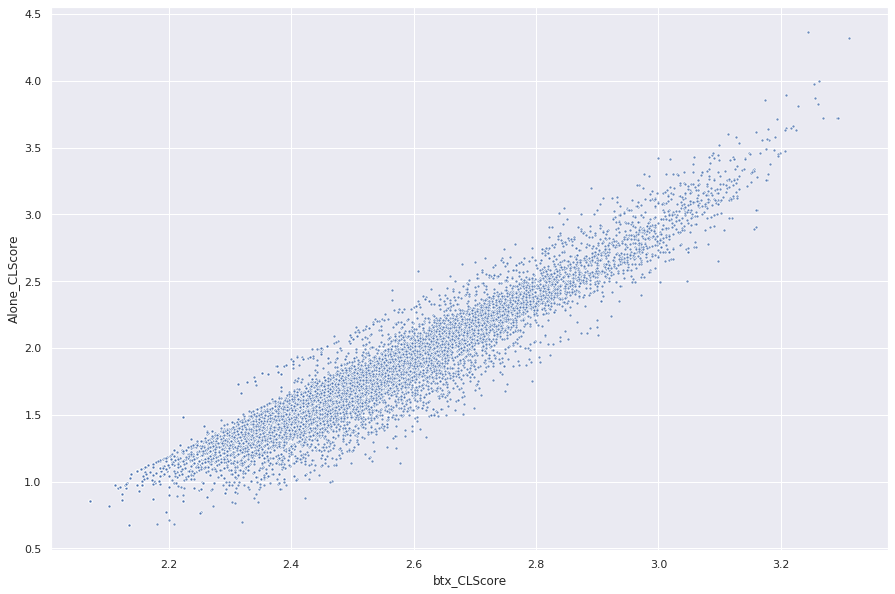

<Figure size 1080x720 with 0 Axes>

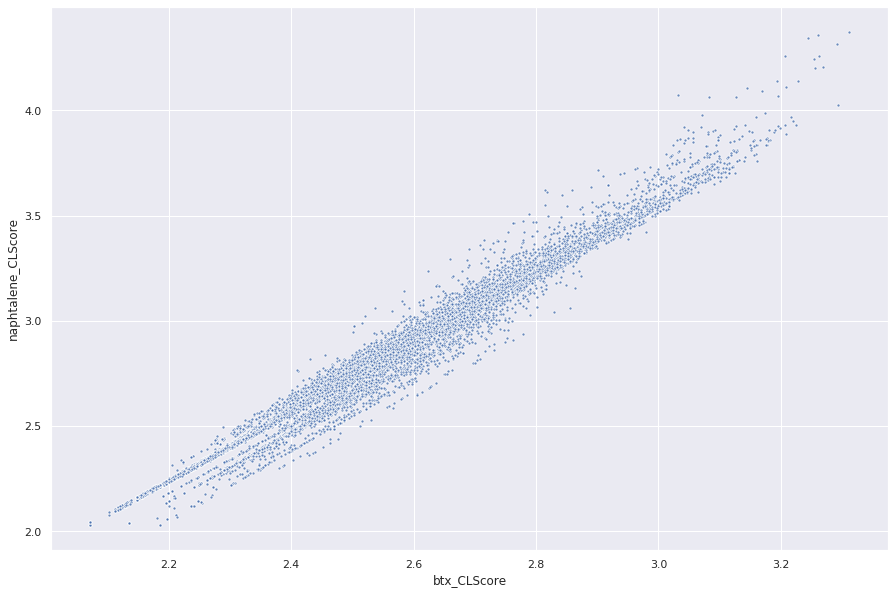

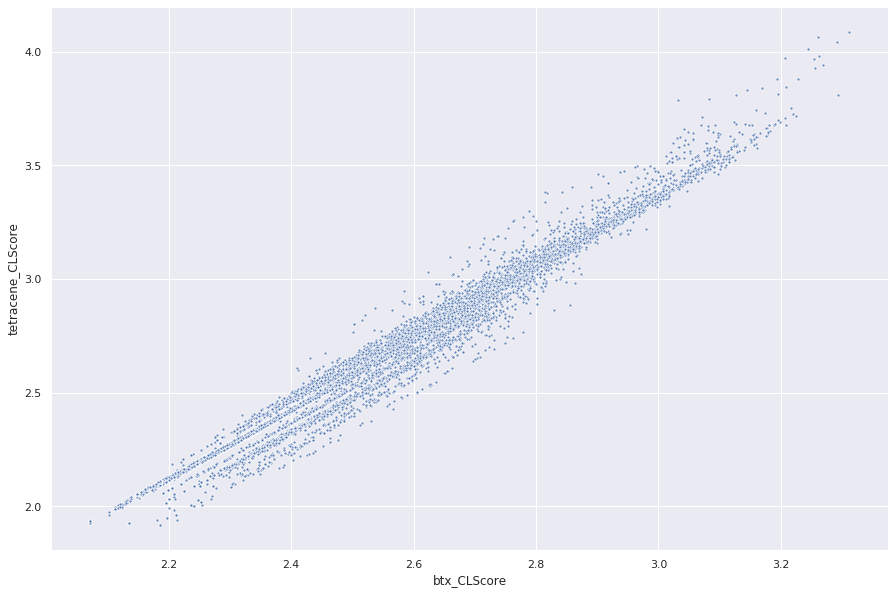

In [27]:
for prop in ["qed", "penalized_logP", "CLScore"]:
    for category in categories:
        plt.figure(figsize=(15,10))

        if category != "btx":
            sns.scatterplot(x="btx_" + prop, y=category+"_"+prop, data=complete_df_prefixed, marker=".", alpha=0.8)
    
    plt.show()